# LAB 7

In [5]:
import requests 
import json
import csv
import pandas as pd

from matplotlib import pyplot as plt
import numpy as np

In [6]:
lat = "42.098701"
lon = "-75.912537"
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")
json_file = genius.json()

json_file['@context']

forecast = json_file['properties']['forecast']
new_request = requests.get(forecast)

json = new_request.json()

csv_file = open('weather.csv','w',newline='',encoding="utf-8")
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["Name", "Temperature", "Detailed Forecast"])

periods = json['properties']['periods']
for i in periods:
    name = i['name']
    temp = i['temperature']
    dtf = i['detailedForecast']
    print(name,temp,dtf)
    csv_writer.writerow([name,temp,dtf])
    
csv_file.close()

sheet = pd.read_csv('weather.csv')
sheet

This Afternoon 52 Sunny, with a high near 52. West wind around 12 mph.
Tonight 30 Mostly clear, with a low around 30. Southwest wind 5 to 9 mph.
Tuesday 55 Mostly sunny, with a high near 55. Southwest wind 6 to 10 mph.
Tuesday Night 33 Mostly cloudy, with a low around 33. Southeast wind 2 to 8 mph.
Wednesday 56 A slight chance of rain showers after 2pm. Mostly cloudy, with a high near 56. Southeast wind 2 to 10 mph. Chance of precipitation is 20%.
Wednesday Night 44 A chance of rain showers. Mostly cloudy, with a low around 44. Chance of precipitation is 40%.
Thursday 60 Rain showers likely. Cloudy, with a high near 60. Chance of precipitation is 70%.
Thursday Night 38 Rain showers likely. Cloudy, with a low around 38. Chance of precipitation is 70%.
Friday 47 A chance of rain showers. Cloudy, with a high near 47. Chance of precipitation is 50%.
Friday Night 34 A chance of rain before 1am, then a chance of rain and snow. Mostly cloudy, with a low around 34. Chance of precipitation is 5

,Name,Temperature,Detailed Forecast
0,This Afternoon,52,"Sunny, with a high near 52. West wind around 1..."
1,Tonight,30,"Mostly clear, with a low around 30. Southwest ..."
2,Tuesday,55,"Mostly sunny, with a high near 55. Southwest w..."
3,Tuesday Night,33,"Mostly cloudy, with a low around 33. Southeast..."
4,Wednesday,56,A slight chance of rain showers after 2pm. Mos...
5,Wednesday Night,44,"A chance of rain showers. Mostly cloudy, with ..."
6,Thursday,60,"Rain showers likely. Cloudy, with a high near ..."
7,Thursday Night,38,"Rain showers likely. Cloudy, with a low around..."
8,Friday,47,"A chance of rain showers. Cloudy, with a high ..."
9,Friday Night,34,"A chance of rain before 1am, then a chance of ..."


Text(0.5, 1.0, 'Forecasted Temperature')

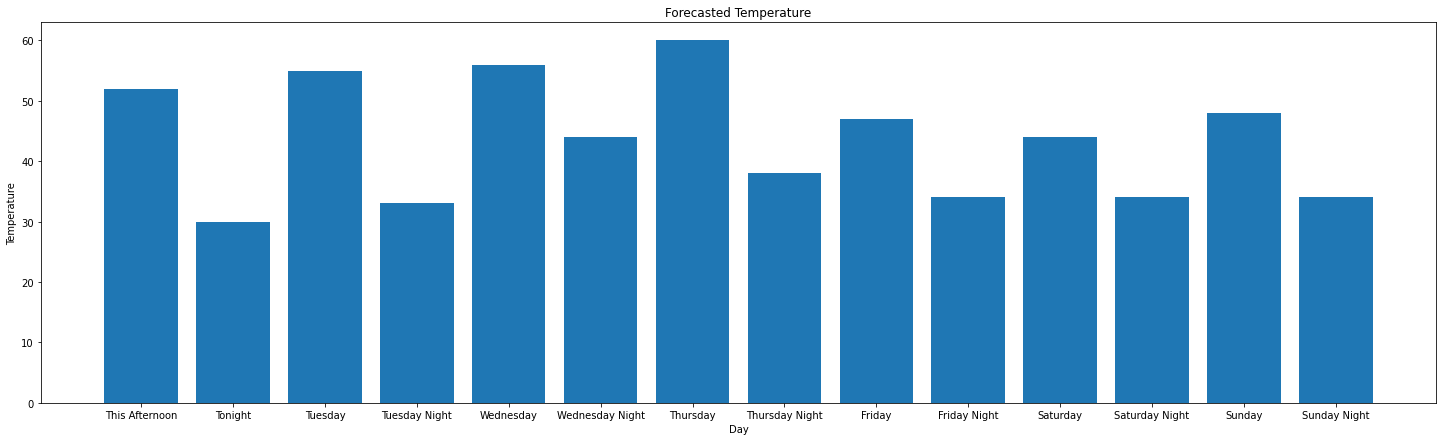

In [30]:
df = pd.DataFrame(sheet)
name = df["Name"]
temp = df['Temperature']

fig = plt.figure(figsize = (25,7))

#BONUS: I was able to make the days not crowd each other on the x axis by increasing the w in the figsize(w,h) to 25.
#https://www.dataquest.io/blog/how-to-plot-a-bar-graph-matplotlib/

plt.bar(name,temp)

plt.xlabel('Day')
plt.ylabel('Temperature')
plt.title('Forecasted Temperature')

In [37]:
Year = 2023
CountryCode = "FR"
genius = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/{Year}/{CountryCode}")
json_file = genius.json()

json_file

# the date is the date of the holiday.
# the local name is what the locals who celebrate would call it.
# the name is the name of the holiday in English.
# the CountryCode is the IOS code of the country we are using.
# The fixed is a True or False if the public holiday is every year on the same date.
# global is a true or false if the holiday is in every county.
# counties is if global is False, then the federal states can be found here. Otherwise, it would be None.
# launchYear is the year that the public holiday was first launched.
# types is whether the holiday is public, bank (banks and offices are closed), school (schools are closed), authorities, optional, or observance (optional festivity).

[{'date': '2023-01-01',
  'localName': "Jour de l'an",
  'name': "New Year's Day",
  'countryCode': 'FR',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': 1967,
  'types': ['Public']},
 {'date': '2023-04-10',
  'localName': 'Lundi de Pâques',
  'name': 'Easter Monday',
  'countryCode': 'FR',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': 1642,
  'types': ['Public']},
 {'date': '2023-05-01',
  'localName': 'Fête du Travail',
  'name': 'Labour Day',
  'countryCode': 'FR',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-08',
  'localName': 'Victoire 1945',
  'name': 'Victory in Europe Day',
  'countryCode': 'FR',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-18',
  'localName': 'Ascension',
  'name': 'Ascension Day',
  'countryCode': 'FR',
  'fixed': False,
  'global': True,
  'counties': None,
  'l

In [38]:
Year = 2023
countrycodes = ["US","AU","IE","IT","NZ","VN","FR","CZ","CN","CR"]

length = 0

for i in countrycodes:
    genius = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/{Year}/{i}")
    json_file = genius.json()
    length += len(json_file)
    print(i,len(json_file))
print(length)

US 13
AU 21
IE 11
IT 12
NZ 23
VN 4
FR 11
CZ 13
CN 7
CR 11
126


In [39]:
#BONUS

Year = 2023
countrycodes = ["US","AU","IE","IT","NZ","VN","FR","CZ","CN","CR"]

length = 0

csv_file = open('publicholidays.csv','w',newline='',encoding="utf-8")
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["Country", "Number of Holidays"])

for i in countrycodes:
    genius = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/{Year}/{i}")
    json_file = genius.json()
    length += len(json_file)
    holidays = len(json_file)
    csv_writer.writerow([i,holidays])

print(length)

csv_file.close()

sheet2 = pd.read_csv('publicholidays.csv')
sheet2

126


,Country,Number of Holidays
0,US,13
1,AU,21
2,IE,11
3,IT,12
4,NZ,23
5,VN,4
6,FR,11
7,CZ,13
8,CN,7
9,CR,11


Text(0.5, 1.0, 'Public Holidays of 10 Countries')

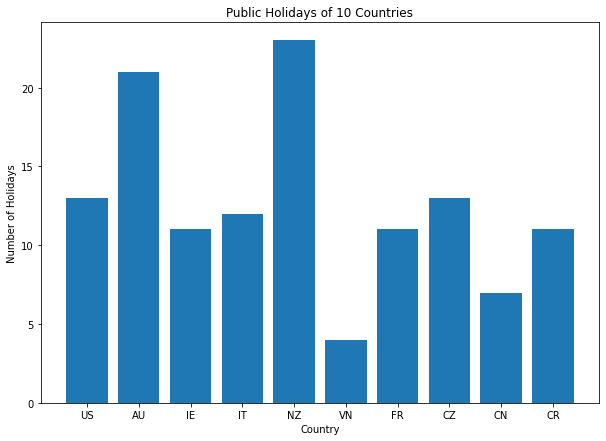

In [40]:
df2 = pd.DataFrame(sheet2)
country = df2["Country"]
h = df2['Number of Holidays']

fig = plt.figure(figsize = (10,7))

plt.bar(country,h)

plt.xlabel('Country')
plt.ylabel('Number of Holidays')
plt.title('Public Holidays of 10 Countries')